<a href="https://colab.research.google.com/github/ShashwatPatel107/Exploratory-Data-Analysis-EDA/blob/main/Shashwat_Patel_Zero_Pandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratery Data Analysis of Crime In Chicago Using Python
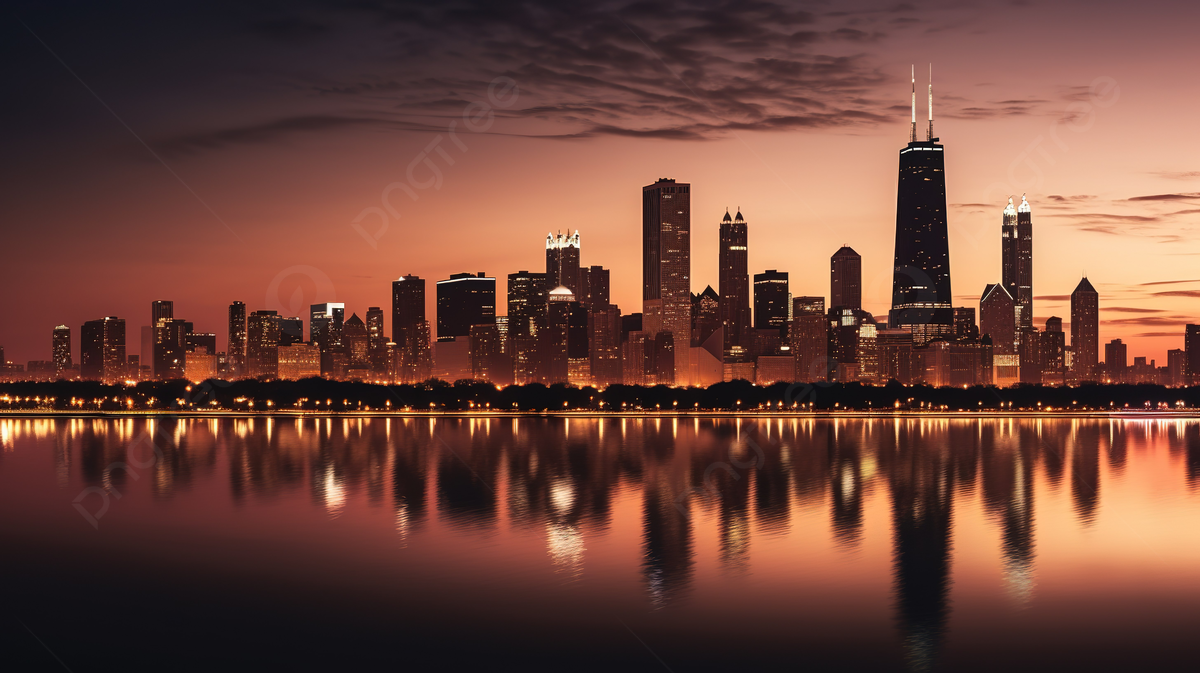

# 1. INTRODUCTION

## What is Data Analysis.

Data analysis is the process of examining, cleaning, transforming, and modeling data with the goal of discovering useful information, suggesting conclusions, and supporting decision-making. It involves using statistical and computational techniques to uncover patterns, relationships, and trends within data.

## What is Data Visualization?
Data Visulization is a graphical representation of a given information and data. Visulization tools like charts Graphs and maps, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion by see and understand trends, outliers, and patterns in data.

## What project will do?
This project aims to extract meaningful information from the data Analysis and visualization using Python, Matplotlib, Plotly, and Pandas.

This Project will analysis and visualize data of various incident of crime in city of Chicago.

## Project Outline
Steps for Data Visulization and Analysis

1. DATA COLLECTION
  * Download Dataset from internet using "opendatasets".
  * Read Dataset with Pandas
  * Create Dataframe
  * Remove unwanted Columns
  * Clean raw data with Pandas

2. EXPLORATORY ANALYSIS & VISUALIZATION
  * Matplotlib
  * Seaborn
  * Plotly.express
  * Folium

# 2.  DATA COLLECTION

## Importing Necessary Libraries

In [ ]:
! pip install opendatasets --quiet

In [ ]:
# importing Necassary Libraries

# Download dataset from Internet
import opendatasets as od

# Library for Data analysis
import pandas as pd

# Library for Numerical Computation
import numpy as np

# LIbrary for Static visualization
import matplotlib.pyplot as plt

# High level Statisical graphics
import seaborn as sns

# Create Intractive charts
import plotly.express as px

# Folium for Geospatial Data
import folium

# KMeans for Clustering Markers
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster

## Downloading Dataset


The [DATASET]("https://www.kaggle.com/datasets/spirospolitis/chicago-crimes-20012018-november") we'll use for this project is from Kaggle. created using [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data).

The data set have **6.99M+ rows** and **22 columns** of data.


In [ ]:
# kaggle dataset link
kaggle_url = "https://www.kaggle.com/datasets/spirospolitis/chicago-crimes-20012018-november"

In [ ]:
# Download dataset
od.download_kaggle_dataset(kaggle_url, "Chicago_Crime")

In [ ]:
# read CSV and create data frame
crime_df = pd.read_csv("/content/Chicago_Crime/chicago-crimes-20012018-november/city_of_chicago_crimes_2001_to_present.csv")

In [ ]:
# Convert to feather formet for faster speed
crime_df.to_feather("crime.feather")

## Preparing DataFrame

In [ ]:
# Create Data frame using feather file
raw_df = pd.read_feather("crime.feather")

In [ ]:
# Viewing Dataset Columns
raw_df.columns

In [ ]:
# remove Unwanted columns
wanted_cols = ['Case Number',
 'Date',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Year',
 'FBI Code',
 'Latitude',
 'Longitude']

## Sampling

In [ ]:
# Create a sample for saving computational time.
sample_size = 10000
raw_df = raw_df.sample(n=sample_size, random_state=42) # for Entire Dataset Comment this out

df = raw_df.loc[:, wanted_cols]

In [ ]:
print(df.shape)

(10000, 11)


In [ ]:
print(df.info())

In [ ]:
# Statistical Values of Numerical Columns
print(df.describe)

In [ ]:
list(df.columns)

In [ ]:
df

## Data Cleaning

In [ ]:
# chacking How many missing values
na = df.isna().sum()
print(na)

In [ ]:
# create a bar plot
fig_na = plt.bar(na.index, na.values)

# set chart title and axis labels
plt.title('Number of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# Remove rows which are missing 'Case Number' value
df.dropna(subset=["Case Number"] , inplace = True)

In [ ]:
df.columns

In [ ]:
# removing Null values columns
drop_na_list =["Latitude", "Longitude"]
df.dropna(subset =drop_na_list, inplace=True)

In [ ]:
# fill missing year values with values present in cell before
df["Location Description"].fillna(method = "ffill",  inplace = True)

In [ ]:
print(df.shape)
df.isna().sum()

In [ ]:
na = df.isna().sum()
print(na)

In [ ]:
print(df)

Data Looks clean, No Missing Values in DataFrame.

# 3. EXPLORATORY ANALYSIS AND VISUALIZATION


Questions:

1. What is the crime rate on a yearly basis?
2. What are the places where most crimes happened?
3. What are the most common crimes being committed in Chicago City?
4. Which location is a hotspot for crime in Chicago?
5. Does more crime get committed during the dark hours?
6. What are the most common types of crimes committed by FBI codes?
7. Is there any relation between arrests and domestic crime?
8. How many crimes are committed on a daily basis?

## 1. What is the crime rate on a yearly basis?

In [ ]:
# Year By Year crime rate
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime datatype

fig1 = px.histogram(df["Date"].sort_values(ascending=True))

fig1.update_layout(title = "Year By Year Crime Rate",
                   title_x=0.45,
                   title_font_family="Times New Roman",
                   title_font_color="brown",
                   title_font_size= 30,
                   xaxis_title = "YEAR",
                   yaxis_title = "Number of Crimes",
                   xaxis_title_font_color="brown",
                   yaxis_title_font_color="brown" )

fig1.show()

We can clearly see that crime rate has been come down as compaired to previous years.

## 2. What are the places where most crimes happened?

In [ ]:
# Top 10 Places of Crime
location_des_df = df["Location Description"].value_counts().head(10).reset_index()
location_des_df.columns = ["Location Description", "Count"]

fig2 = px.bar(location_des_df,
              x="Location Description",
              y="Count")

fig2.update_layout(title = "Top 10 Places of Crime",
                   title_x=0.45,
                   title_font_family="Times New Roman",
                   title_font_color="brown",
                   title_font_size= 30,
                   xaxis_title = "Location Description",
                   yaxis_title = "Number of Crimes",
                   xaxis_title_font_color="brown",
                   yaxis_title_font_color="brown"
                   )

fig2.show()

Street, Residence, Apartment are the places where more crime commited.

## 3. What are the most common crime being commited in Chicago City?

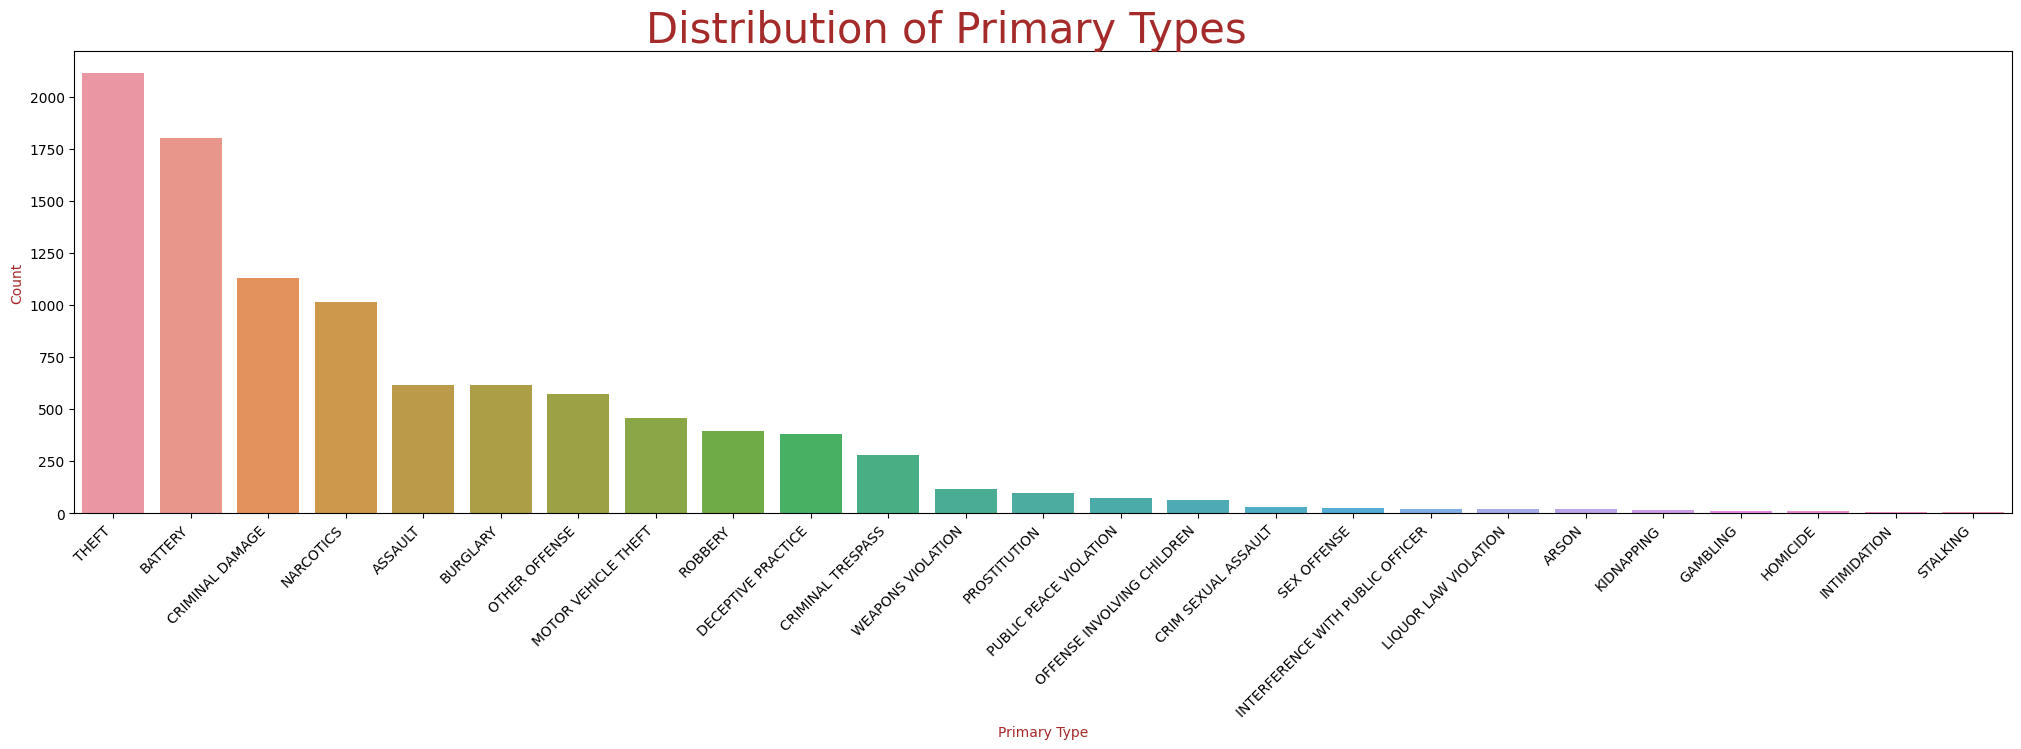

In [ ]:
# Most commited crime type
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='Primary Type',
              order=df['Primary Type'].value_counts().index)

plt.title('Distribution of Primary Types',
          x=0.45,
          color="brown",
          fontsize=30)

plt.xlabel('Primary Type', color = "brown", fontsize=23)
plt.ylabel('Count', color = "brown", , fontsize=23)
plt.xticks(rotation=45, ha='right')

plt.show()

Theft is most common crime in city of Chicago.

## 4.  Which location is a hotspot for crime in Chicago?

In [ ]:
# which location is hotspot

coordinates = df[['Latitude', 'Longitude']].values

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(coordinates)
df['Cluster'] = kmeans.labels_

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

my_map = folium.Map(location=map_center, zoom_start=11,
                    control_scale=True,
                    title=" HotSpot of Crime")

marker_cluster = MarkerCluster().add_to(my_map)

# Add markers for each data point with cluster information
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Cluster: {row['Cluster']}").add_to(marker_cluster)

my_map

Downtown Chicago is hotspot of the crime.

## 5. Does more Crime commited during the Dark hours?

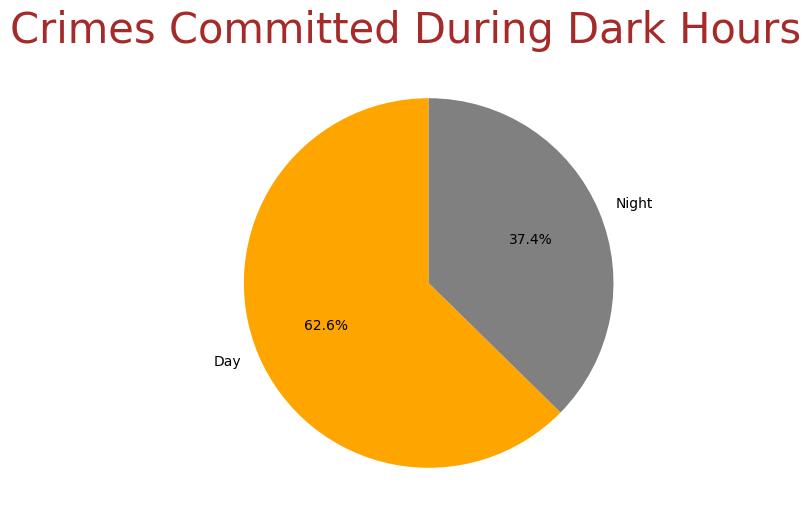

In [ ]:
# Day vs Night
df['Hour'] = df['Date'].dt.hour # Extract the hour

df['Day_Night'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 20 else 'Night')
day_night_counts = df['Day_Night'].value_counts()

plt.figure(figsize=(25, 6))
plt.pie(day_night_counts,
        labels=day_night_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'gray'])

plt.title('Crimes Committed During Dark Hours',
          x=0.45,
          color="brown",
          fontsize=30)

plt.show()

NO, Majority of crime were commited during broad day light.

## 6. What are the most common types of crimes committed by FBI codes?

In [ ]:
fig6 = px.treemap(df, path=['FBI Code'])

fig6.update_layout(
    title="FBI CODES",
    title_x=0.45,
    title_font_family="Times New Roman",
    title_font_color="brown",
    title_font_size=30,
    )

fig6.show()

## 7. Is there any relation between arrests and domestic crime?

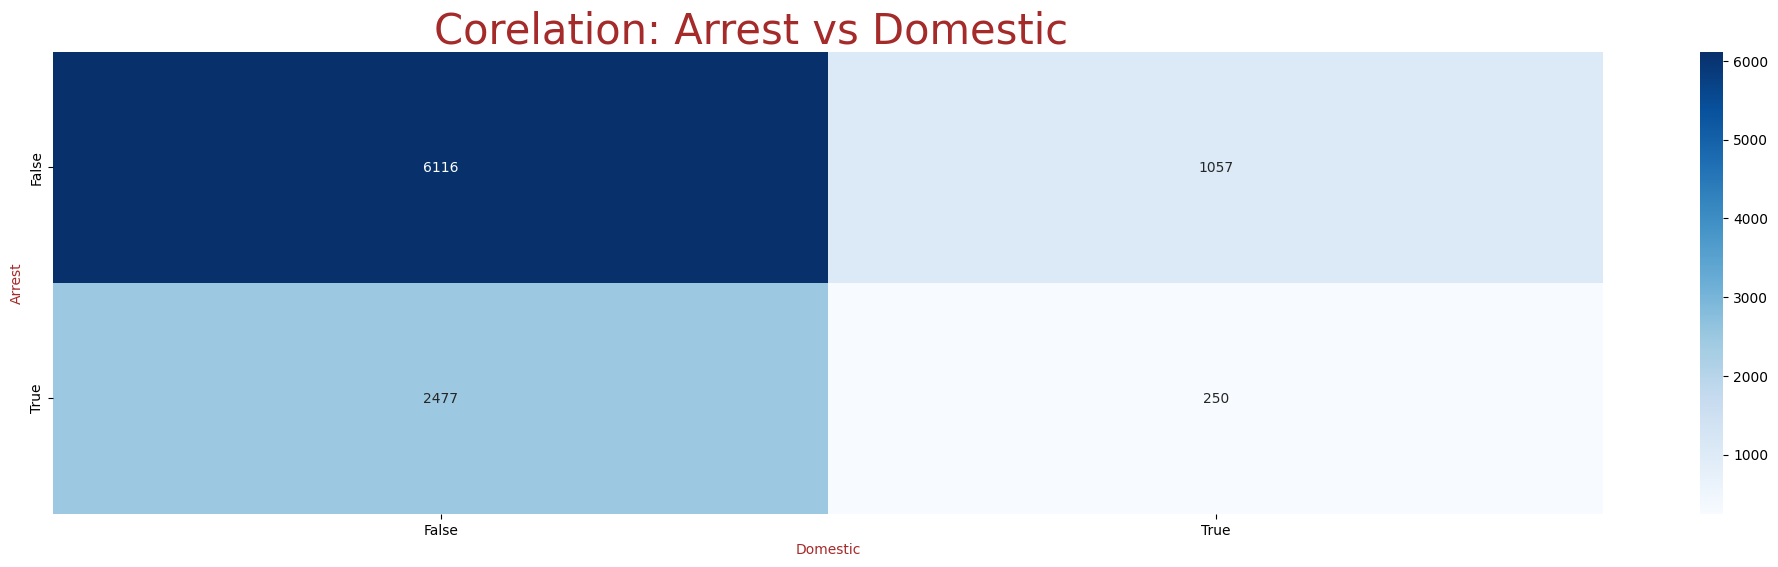

In [ ]:
# Arrest and Domestic Crime
heatmap = pd.crosstab(df['Arrest'], df['Domestic'])

plt.figure(figsize=(25, 6))
sns.heatmap(heatmap,
            annot=True,
            fmt='d',
            cmap='Blues')

plt.title('Corelation: Arrest vs Domestic', x=0.45,  color="brown", fontsize=30)
plt.xlabel('Domestic', color="brown",)
plt.ylabel('Arrest', color="brown",)

plt.show()

Domastic crime have low rate of arrest compaire to others.

## 8. How many crimes are committed on a daily basis?



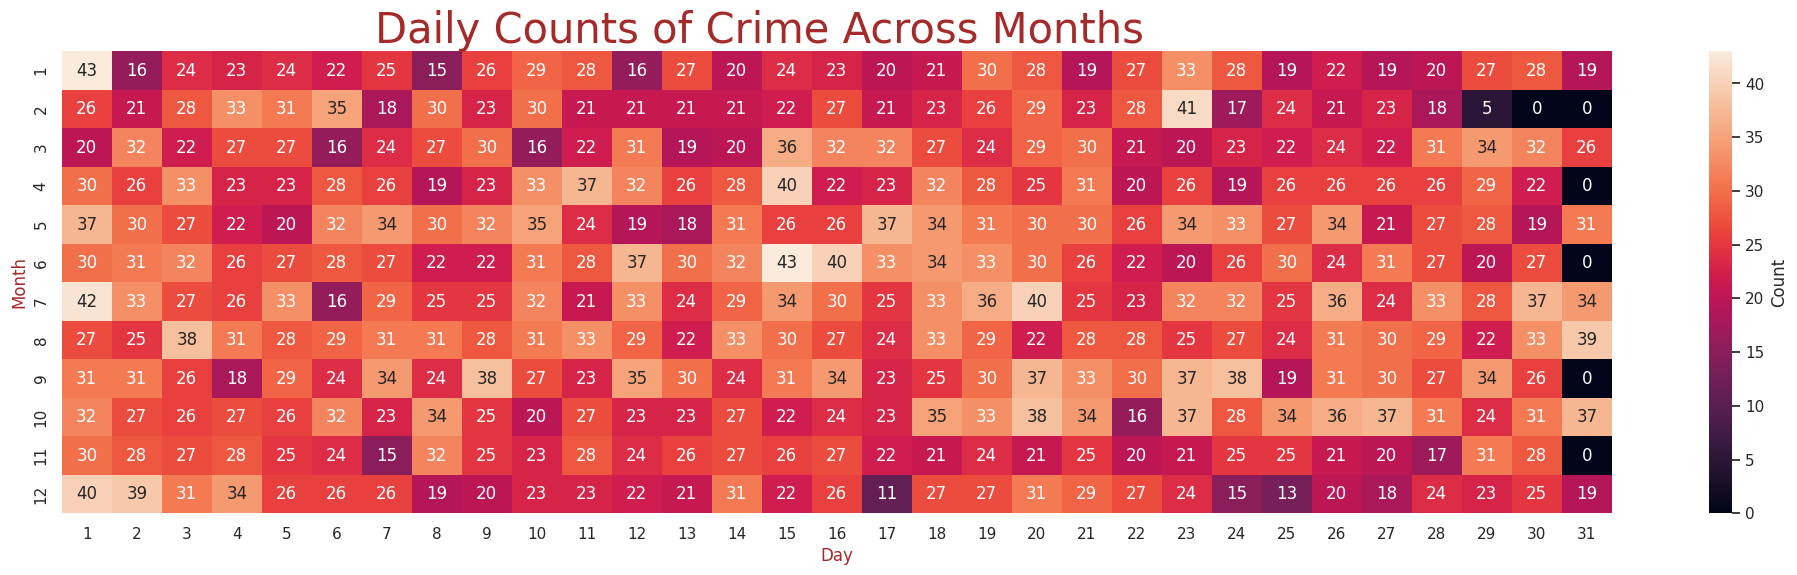

In [ ]:
# Extract day and month information
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Create column with countable value,
df['Count'] = 1

# Create a pivot table to get counts
pivot_table = pd.pivot_table(df, values='Count',
                             index='Month',
                             columns='Day',
                             aggfunc='sum',
                             fill_value=0)

sns.set_theme()
sns.color_palette("flare")

plt.figure(figsize=(25, 6))
sns.heatmap(pivot_table,
            annot=True, fmt='g',
            cbar_kws={'label': 'Count'})

plt.title('Daily Counts of Crime Across Months', x=0.45,  color="brown", fontsize=30)
plt.xlabel('Day', color='brown')
plt.ylabel('Month', color='brown')

plt.show()

MIddle of the year have relatively low crime rates comapire to biggining or towards end of year.

# Conclusion



## Summary
Millions of rows of data and Multiple charts shows something interesting about the Crime and criminals.
PD need to increase petrol on the street. and lot more to be done.

Key Finding:
Theft on street in day light is common crime.
Chicago PD is working hard and bring down the crime rate, and suceed in that.

## Conclusion
From the above's Analysis, provides insights into crime patterns, common crime types, and areas with higher crime rates in Chicago.

Analysis highlights the importance of considering factors like location, time of day, and crime types in understanding and addressing criminal activities.

## Future Work
Working with bigger dataset.

More Indepth Analysis.

Include more cities.

In [ ]:
! pip install jovian --quiet

In [ ]:
import jovian

name = "Shashwat_Patel_Zero_Pandas_Project"

jovian.commit(project = name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
